In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
#add scripts to path
import sys
sys.path.append('../scripts')


from dolfin import *
import matplotlib.pyplot as plt
import numpy as np
import GenerateData as gd
import MeshUtils as mutil
import gmsh
import GenerateGraph as gg

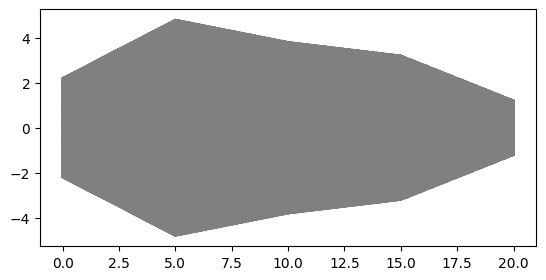

In [16]:
mesh_load = mutil.MeshLoader("../data/mesh_test2/TestMeshes_0")
mesh = mesh_load.mesh
bounds = mesh_load.bounds
face = mesh_load.face
plot(mesh)

In [17]:
tags = {'walls':[1],'inlet':[2],'outlet':[3], 'interface': [4,5,6], 'faces': [7,8,9,10]}
#tags = {'walls':[1],'inlet':[2],'outlet':[3], 'interface': [4,5,6,7,8,9,10,11], 'faces': [12,13,14,15,16,17,18,19]}
mesh_load.update_tags(tags)
mesh_load.measure_definition()

(Measure('interior_facet', subdomain_id='everywhere', domain=Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 40), subdomain_data=<dolfin.cpp.mesh.MeshFunctionSizet object at 0x7f1be7688bb0>),
 Measure('exterior_facet', subdomain_id='everywhere', domain=Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 40), subdomain_data=<dolfin.cpp.mesh.MeshFunctionSizet object at 0x7f1be7688bb0>),
 Measure('cell', subdomain_id='everywhere', domain=Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 40), subdomain_data=<dolfin.cpp.mesh.MeshFunctionSizet object at 0x7f1be76f0230>))

In [ ]:
set_log_active(False)
V = FunctionSpace(mesh_load.mesh,"DG",1)
k = 2
f = Constant(0.0)
u0 = Expression('0.0',degree=0)
# f = Expression('exp(-a*pow(x[0], 2) - a*pow(x[1]-2.5, 2))',degree=2, a=0.2)
# u0 = Expression('exp(-a*pow(x[0], 2) - a*pow(x[1]-2.5, 2))',degree=2, a=0.01)

T = 5
timesteps = 50
dt = T/timesteps

def gaussian(t,a,b,c):
    return a*np.exp(-(t-b)**2/c**2)

time = np.linspace(0,T,timesteps)
g = Expression('a*exp(-(t-b)*(t-b)/c/c)',degree=2,a=2,b=2.5,c=1,t=0)

heat_gaussian = gd.Heat(mesh_load,V,k,f,u0,dt,T,g)
heat_gaussian.solve()
data = gd.DataHeat(heat_gaussian,mesh_load)
data.save_graph(output_dir = "data/graphs_test/")

['flux']
Graph saved to disk.


Graph(num_nodes=5, num_edges=4,
      ndata_schemes={'x': Scheme(shape=(2,), dtype=torch.float32), 'k': Scheme(shape=(1, 1), dtype=torch.float32), 'NodeId': Scheme(shape=(), dtype=torch.float32), 'inlet_mask': Scheme(shape=(), dtype=torch.float32), 'outlet_mask': Scheme(shape=(), dtype=torch.float32), 'interface_length': Scheme(shape=(1, 1), dtype=torch.float32), 'flux': Scheme(shape=(1, 50), dtype=torch.float32), 'dt': Scheme(shape=(1, 1), dtype=torch.float32), 'T': Scheme(shape=(1, 1), dtype=torch.float32)}
      edata_schemes={'EdgeId': Scheme(shape=(), dtype=torch.float32), 'area': Scheme(shape=(1, 1), dtype=torch.float32), 'length': Scheme(shape=(1, 1), dtype=torch.float32)})

In [ ]:
import dgl

bo = dgl.data.utils.load_graphs(f"data/graphs_test/k_{2}.grph")
bo[0][0].ndata['T']

tensor([[[4.9000]],

        [[4.9000]],

        [[4.9000]],

        [[4.9000]],

        [[4.9000]]])

In [ ]:
# #diffusion of a gaussian function
# np.random.seed(50)
tags = {'walls':[1],'inlet':[2],'outlet':[3], 'interface': [4,5,6], 'faces': [7,8,9,10]}
# tags = {'walls':[1],'inlet':[2],'outlet':[3], 'interface': [4,5,6,7,8,9,10,11], 'faces': [12,13,14,15,16,17,18,19]}
for i in range(2):
    it = np.random.randint(0,20)
    mesh_load = mu.MeshLoader(f"data/mesh_new/RandomMesh_{1}")
    mesh = mesh_load.mesh
    bounds = mesh_load.bounds
    face = mesh_load.face
    mesh_load.update_tags(tags)
    mesh_load.measure_definition()
    set_log_active(False)
    k = round(np.random.uniform(30, 80),2)
    V = FunctionSpace(mesh_load.mesh,"DG",1)
    f = Constant(0.0)
    g = Expression('a*exp(-(t-b)*(t-b)/c/c)',degree=2,a=5,b=2.5,c=1,t=0)
    u0 = Expression('0.0',degree=0)
    T = 5
    timesteps = 50
    dt = T/ timesteps

    heat_gaussian = gd.Heat(mesh_load,V,k,f,u0,dt,T,g)
    heat_gaussian.solve()
    #heat_gaussian.plot_solution()
    data = gd.DataHeat(heat_gaussian,mesh_load)
    data.save_graph(output_dir = "data/graphs_new/")


Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Graph saved to disk.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Graph saved to disk.


In [ ]:
import os
import json
import re

# Specify the directory containing .grph files
# input_directory = os.path.expanduser("~/Documents/pacs/pacsproj/data/graphs_rm2/")
input_directory = os.path.expanduser("data/graphs_new/")

# Get the full path
input_directory = os.path.realpath(input_directory)

# Initialize an empty dictionary to store JSON objects for each file
json_dict = {}

# Iterate through each .grph file in the directory
for graph_file in os.listdir(input_directory):
    if graph_file.endswith(".grph"):
        # Extract the filename without extension
        filename_no_extension = os.path.splitext(graph_file)[0]

        # Extract the mu parameter from the filename (assuming it is in the format k_11.3.grph)
        mu_match = re.search(r'_(\d+(\.\d+)?)', filename_no_extension)
        mu = mu_match.group(1) if mu_match else None

        # Create a dictionary for each .grph file
        json_dict[filename_no_extension] = {
            "model_type": "heat_eq",
            # "T": 0.937,
            # "dt": 0.000937,
            # "time_shift": 0,
            # "bc_type": "RCR",
            "mu": mu
        }

# Save the dictionary as a JSON file
json_file_path = os.path.join(input_directory, "dataset_info.json")
with open(json_file_path, 'w') as json_file:
    json.dump(json_dict, json_file, indent=2)

print(f"Created {json_file_path}")

Created /mnt/c/Users/ASUS/Desktop/POLI/PACS/pacsproj/data/graphs_new/dataset_info.json


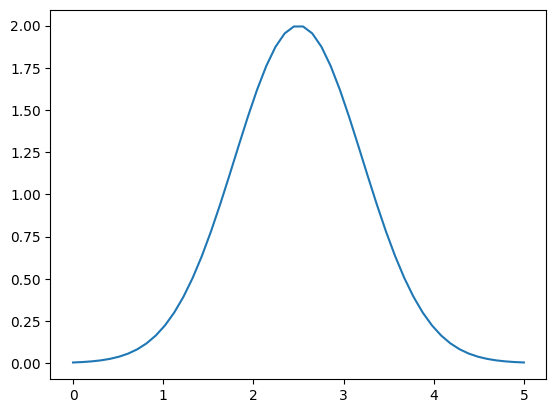

In [ ]:
def f(t):
    return 2*np.exp(-(t-2.5)*(t-2.5)/1/1)

time = np.linspace(0,T,50)
y = f(time)
plt.plot(time,y)